In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
data=pd.read_csv('police_shootings.csv')

In [79]:
data.head(10)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,5,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True
5,6,Kenneth Joe Brown,2015-01-04,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False,-97.423,35.877,True
6,7,Kenneth Arnold Buck,2015-01-05,shot,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False,-111.841,33.328,True
7,8,Brock Nichols,2015-01-06,shot,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False,-97.564,38.704,True
8,9,Autumn Steele,2015-01-06,shot,unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,True,-91.119,40.809,True
9,10,Leslie Sapp III,2015-01-06,shot,toy weapon,47.0,M,B,Knoxville,PA,False,attack,Not fleeing,False,-79.991,40.413,True


*name* - имя убитого  
*date* - дата события  
*manner_of_death* - причина смерти  
*armed* - чем был вооружен убитый  
*age* - возраст убитого  
*gender* - пол убитого (М - Male, F - Female)  
*race* - раса убитого (A - Asian, B - Black, W - White, H -Hispanic, N - Native American, O - Other)  
*city* - город, в котором произошло событие 
*state* - штат, в котором произошло событие  
*signs_of_mental_illness* - наличие у убитого признаков психического заболевания (True or False)  
*threat_level* - уровень угрозы  
*flee* - пытался ли одозреваемый скрыться  
*body_camera* - наличие у полицейского камеры (True or False)  
*longitude* - географическая долгота места происшествия  
*latitude* - географическая широта места происшествия  
*is_geocoding_exact* - является ли определение   местоположения точным (True or False)  

## Проверка нулевых значений у признаков

In [80]:
data.isnull().sum()

id                            0
name                        417
date                          0
manner_of_death               0
armed                       209
age                         482
gender                       20
race                       1460
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        875
body_camera                   0
longitude                   837
latitude                    837
is_geocoding_exact            0
dtype: int64

In [81]:
data.id.count()

7729

Пустые значения чаще всего встречаюся у признака race, а также longitude, latitude и flee. Относительно небольшое количество пустых значенй есть в столбцах name, armed, age, gender. Рассмотрим подробнее данные признаки, чтобы избавиться от пустых значений в них.

## Анализ признаков

<AxesSubplot:>

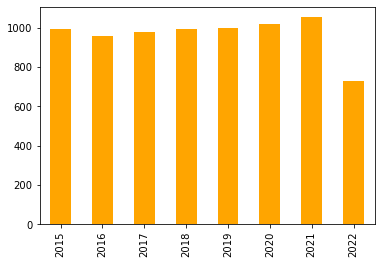

In [29]:
data['year']=0
for i in data:
    data['year']=data.date.str.extract('([0-9]+)\-')
years = data.year.value_counts().sort_index()
years.plot.bar(color = 'orange')

Как видно из графика, с 2016 по 2021 происходило медленное увеличение количества смертей. Однако в 2022г мы видим резкий спад.

In [12]:
pd.crosstab(data.body_camera, data.year)

year,2015,2016,2017,2018,2019,2020,2021,2022
body_camera,,,,,,,,
False,919,813,872,871,863,845,838,602
True,75,145,109,122,136,175,216,128


In [24]:
data.gender.value_counts()

M    7361
F     348
Name: gender, dtype: int64

<AxesSubplot:ylabel='gender'>

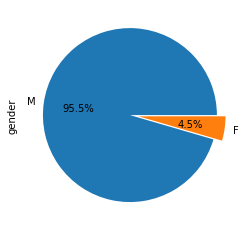

In [99]:
data.gender.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%')

Мужчины составляют 95,5% всех убитых, в то время как женщины всего 4,5%. Учитывая полученные данные, можем заполнить нулевые значения в столбце gender, как M.

In [31]:
data.gender.fillna('M',inplace = True)
data.gender.isnull().any()

False

In [ ]:
data.age.describe()

Средний возраст убитых - 37 лет. Самый старый потерпевший имел возраст 92 года, а самый маленький - 2 года. 

<AxesSubplot:>

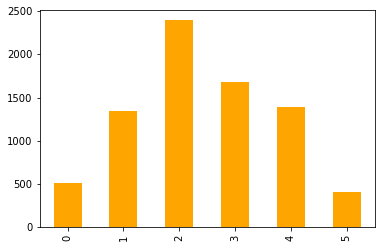

In [32]:
data['age_band']=0
data.loc[data['age']<=15,'age_band']=0
data.loc[(data['age']>15)&(data['age']<=25),'age_band']=1
data.loc[(data['age']>25)&(data['age']<=35),'age_band']=2
data.loc[(data['age']>35)&(data['age']<=45),'age_band']=3
data.loc[(data['age']>45)&(data['age']<=60),'age_band']=4
data.loc[data['age']>60,'age_band']=5
data['age_band'].value_counts().sort_index().plot.bar(color = 'orange')

Наибольшее количество убитых приходится на возрастную группу от 25 до 35 лет

<AxesSubplot:>

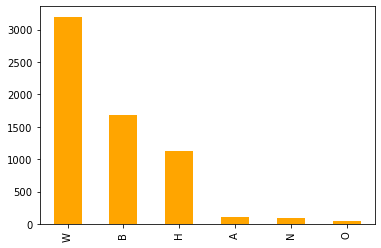

In [90]:
data['race'].value_counts().plot.bar(color = 'orange')

In [22]:
data['race'].value_counts()

W    3198
B    1686
H    1128
A     113
N      97
O      47
Name: race, dtype: int64

Белый цвет кожи соответствует наибольшему количеству убитых - более 3198 человек, что почти вдвое больше, чем темнокожих - 1686 человек.  

In [36]:
data.city.value_counts().head(10)

Los Angeles    128
Phoenix        101
Houston         87
San Antonio     66
Las Vegas       63
Albuquerque     54
Chicago         49
Columbus        48
Denver          46
Tucson          44
Name: city, dtype: int64

In [56]:
danger_state = data.state.value_counts()
danger_state.head(10)

CA    1114
TX     694
FL     494
AZ     351
GA     291
CO     279
OH     222
NC     221
WA     212
OK     211
Name: state, dtype: int64

Самым опасным из городов является Лос Анджелес (Калифорния), далее идут Финикс (Аризона) и Хьюстон (Техас). 
Самыми опасными штатами являются Калифорния и Техас.

In [61]:
data.signs_of_mental_illness.value_counts()

False    6089
True     1640
Name: signs_of_mental_illness, dtype: int64

<AxesSubplot:>

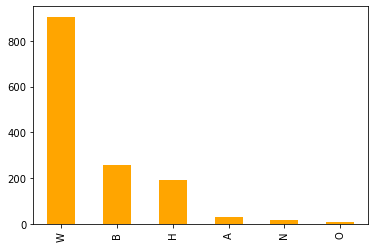

In [71]:
data[data.signs_of_mental_illness == True].race.value_counts().plot.bar(color = 'orange')

## Корреляция признаков

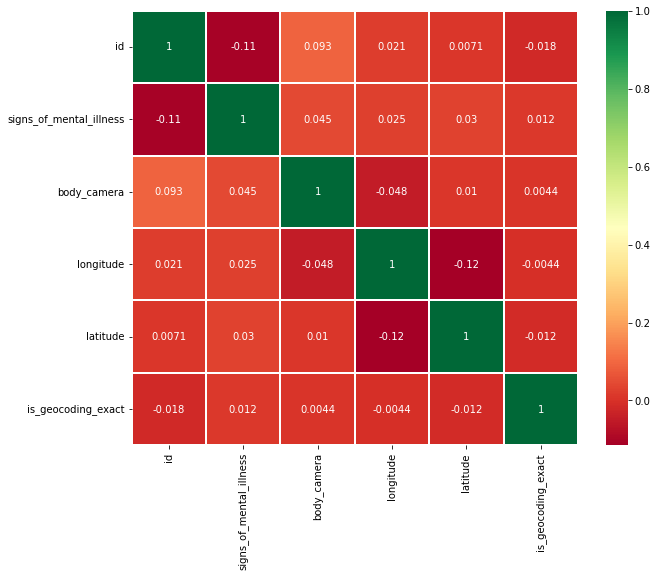

In [103]:
data.drop(['age'],axis = 1, inplace = True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()